BRITISH AIRWAYS ANALYSIS
---


In [4]:
#import packages

import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:.5f}'.format 
np.set_printoptions(suppress=True, precision=5)

## <center><h2>Thống kê mô tả <h2><center>

True     1002
False     998
Name: verified, dtype: int64

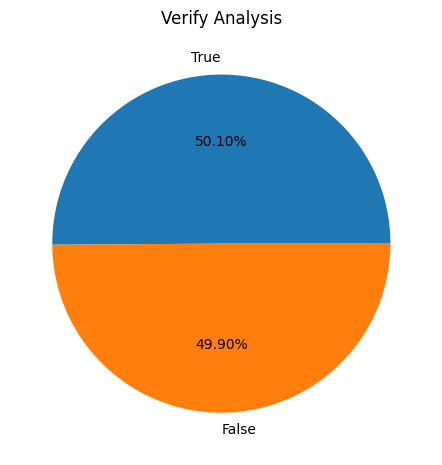

In [19]:
# Verify trp count
plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
plt.title("Verify Analysis")
plt.pie(df2['verified'].value_counts().values, labels = df2['verified'].value_counts().index, autopct='%1.2f%%', shadow=False)
pass

df2['verified'].value_counts()

Positive    1069
Negative     703
Neutral      228
Name: Analysis, dtype: int64

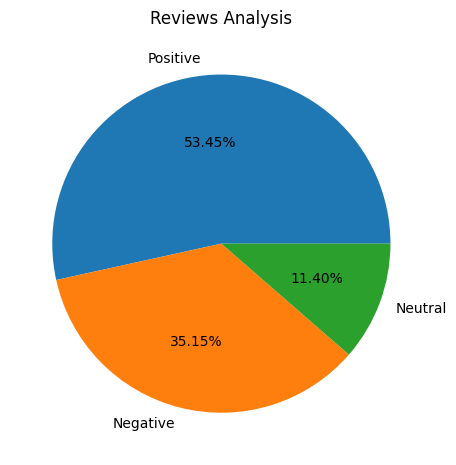

In [20]:
# Setiment count

plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
plt.title("Reviews Analysis")
plt.pie(df2['Analysis'].value_counts().values, labels = df2['Analysis'].value_counts().index, autopct='%1.2f%%', shadow=False)
pass

df2['Analysis'].value_counts()

1     559
2     264
3     231
8     167
10    151
7     140
4     137
9     137
5     121
6      93
Name: ratings, dtype: int64

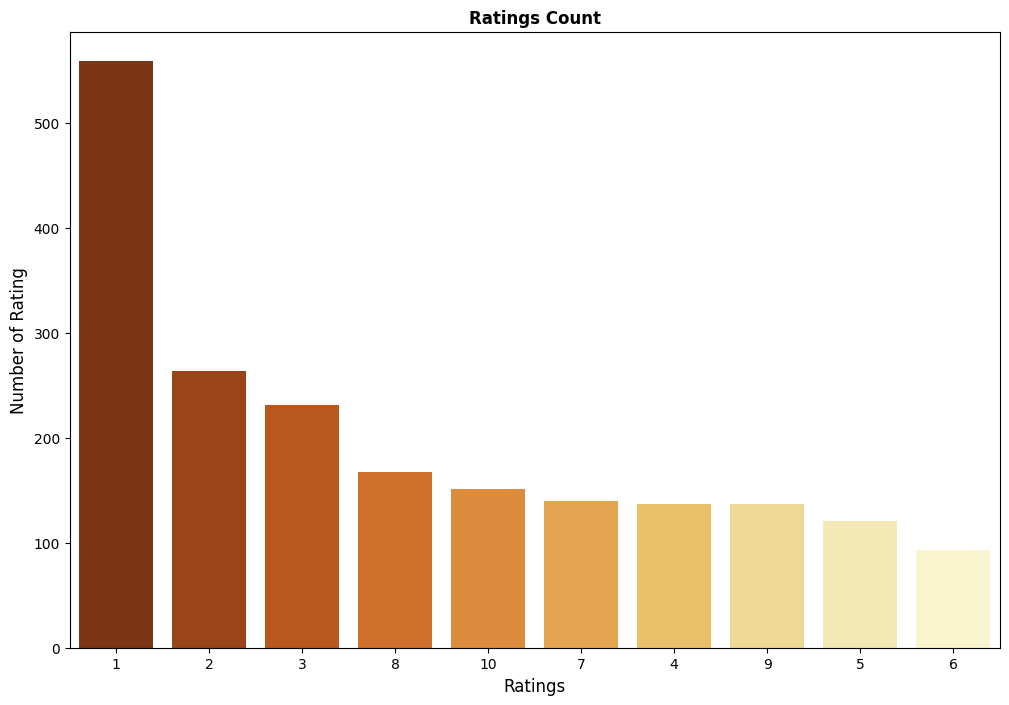

In [21]:
#rating count
plt.figure(figsize=(12,8))

sns.countplot(x ='ratings', data = df2, order = pd.value_counts(df2['ratings']).index, palette = 'YlOrBr_r')
plt.title('Ratings Count', weight='bold')
plt.xlabel('Ratings', fontsize=12)
plt.ylabel('Number of Rating', fontsize=12)
pass

df2['ratings'].value_counts()

Lượng rating 1 và 2 sao chiếm đa số, hơn 500, gần 300 số lượng trong khi các rating khác dao động ở 200 

In [22]:
df_country_review = pd.DataFrame(df2.country.value_counts().head(10)).reset_index()
df_country_review.rename(columns={'index':'country','country':'total_reviews'}, inplace=True)
df_country_review

,country,total_reviews
0,United Kingdom,1236
1,United States,233
2,Australia,64
3,Canada,63
4,Germany,44
5,South Africa,25
6,Switzerland,23
7,Ireland,19
8,Netherlands,19
9,Singapore,18


không khó hiểu khi hãng hàng không của nước nhà sẽ có lượt review chiếm đa số so với các nước khác

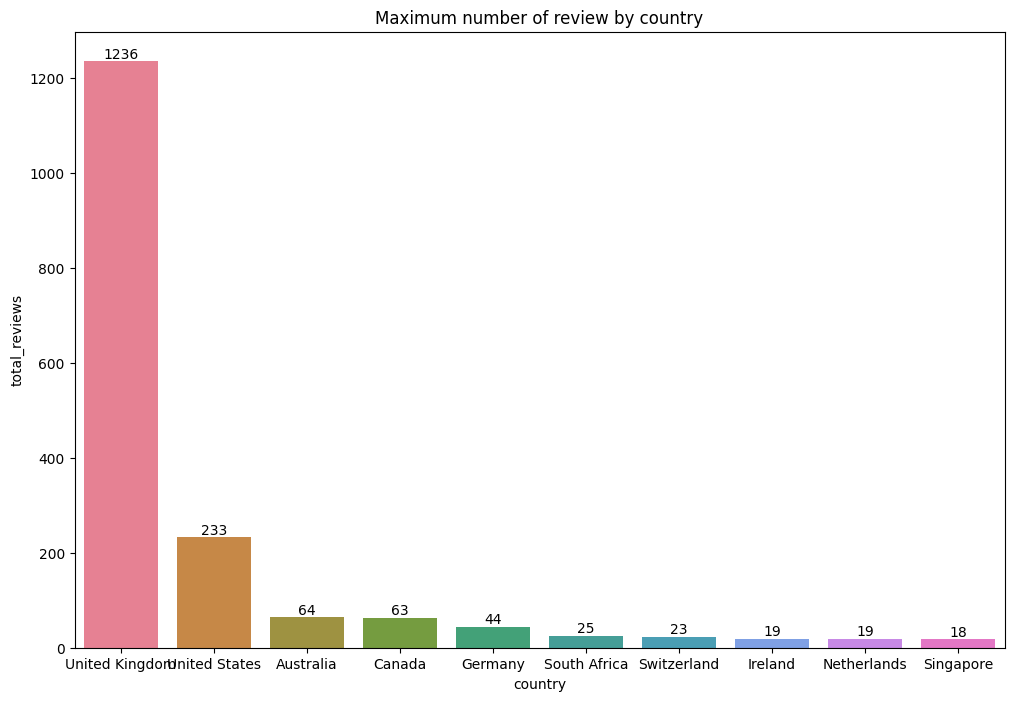

In [23]:
plt.figure(figsize =(12,8))
plt.title("Maximum number of review by country")
a = sns.barplot(x=df_country_review.country, y =df_country_review.total_reviews , data = df_country_review, palette='husl')
a.bar_label(a.containers[0])

pass

### Wordcloud
---
Word Cloud or Tag Clouds is a visualization technique for texts that are natively used for visualizing the tags or keywords from the websites

In [24]:
from wordcloud import WordCloud, STOPWORDS

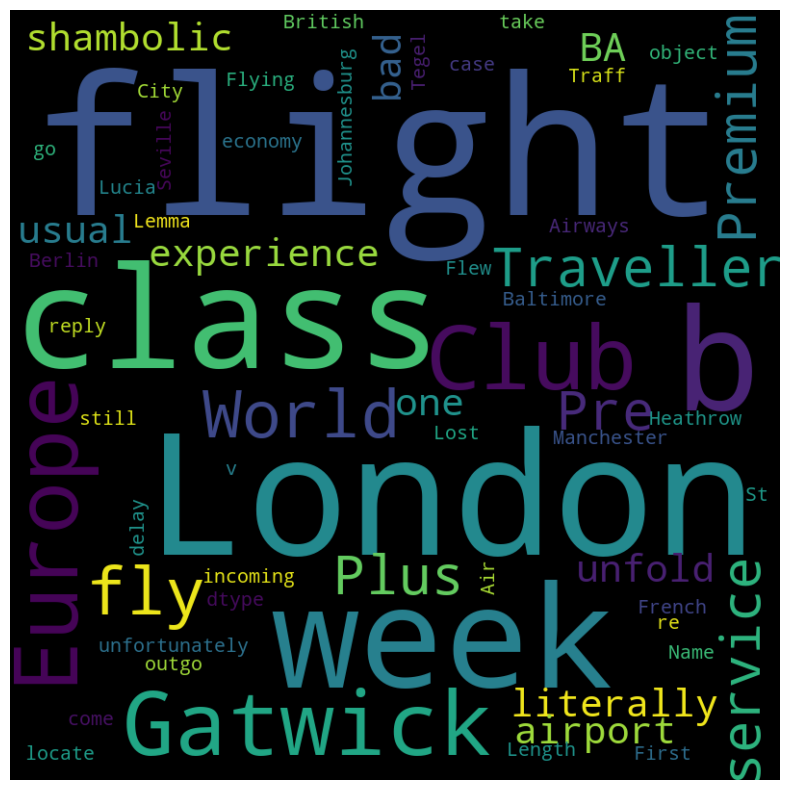

In [25]:
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        height = 200,
        width = 200,
        stopwords=stopwords,
        max_words= 1000,
        max_font_size= 50,
        scale=4,
        random_state=1)

    wordcloud= wordcloud.generate(str(data))

    fig = plt.figure(figsize=(10, 10))
    plt.axis('off')

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

show_wordcloud(df2['Lemma'])

WordCloud những từ hay được nhắc tới trong các comment, ngoài những từ như London hay week, class thì có những động/tính từ sẽ miêu tả được trải nghiệm người dùng như lost, delay, pre, bad, still, length, unfortunate có thể thể hiện phần nào. Để cụ thể hơn, ta cần loại bỏ các từ tiếng Anh có tính trung lập và không có ý nghĩa đi và xem lại những yếu tố khách hàng quan tâm

In [26]:
# Word frequency that not used for segmentation
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

lemma_dtb = " ".join(df2['clean_review'])
lemma_dtb = str(lemma_dtb)
lemma_dbt1 = lemma_dtb.split(" ")

stopwords = text.ENGLISH_STOP_WORDS.union(['We','BA','London','French','excel','December','AA','incoming','already','Angeles','Airways','Air','Traff','short', 'onto',
                                           're','British','flight','Back','Rome','Atlanta','French','dtype','Absolutely','I', ' ', 'The','-', '','economy','did','fly','flight.'
                                           ,'like','This','airline','passengers','check','Heathrow','They','plane','It','it','bussiness','customer','got'])

new_words = [word for word in lemma_dbt1 if word not in stopwords]

nlp_words=FreqDist(new_words).most_common(20)

#create a dataframe of these word and its frequencies
all_fdist = pd.Series(dict(nlp_words))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'service'),
  Text(1, 0, 'crew'),
  Text(2, 0, 'seat'),
  Text(3, 0, 'food'),
  Text(4, 0, 'cabin'),
  Text(5, 0, 'time'),
  Text(6, 0, 'seats'),
  Text(7, 0, 'good'),
  Text(8, 0, 'staff'),
  Text(9, 0, 'business'),
  Text(10, 0, 'class'),
  Text(11, 0, 'just'),
  Text(12, 0, 'hours'),
  Text(13, 0, 'told'),
  Text(14, 0, 'flights'),
  Text(15, 0, 'hour'),
  Text(16, 0, 'meal'),
  Text(17, 0, 'lounge'),
  Text(18, 0, 'boarding'),
  Text(19, 0, 'long')])

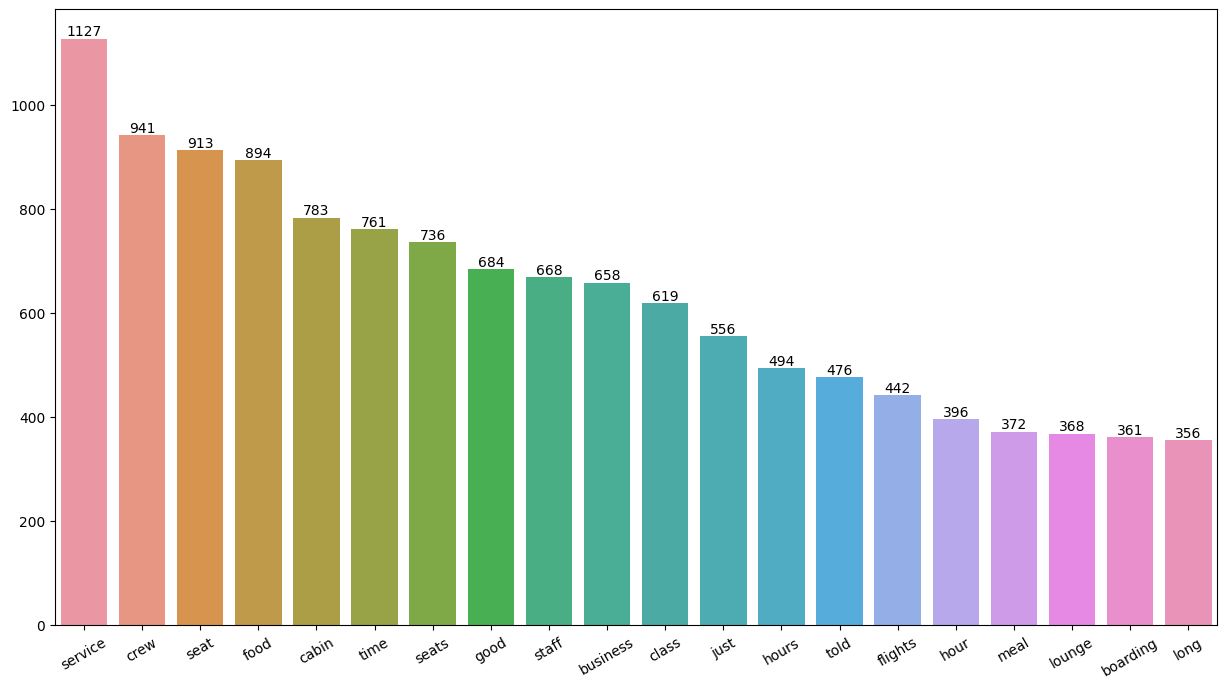

In [27]:
## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(15,8))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)

Dịch vụ(service) là từ bao hàm các từ khác nên được mention nhiều nhất, sau đó tới chỗ ngồi(seat) hay đồ ăn(food), thời gian(ở khía cạnh đợi, order chuyến, di chuyển..)

<Axes: >

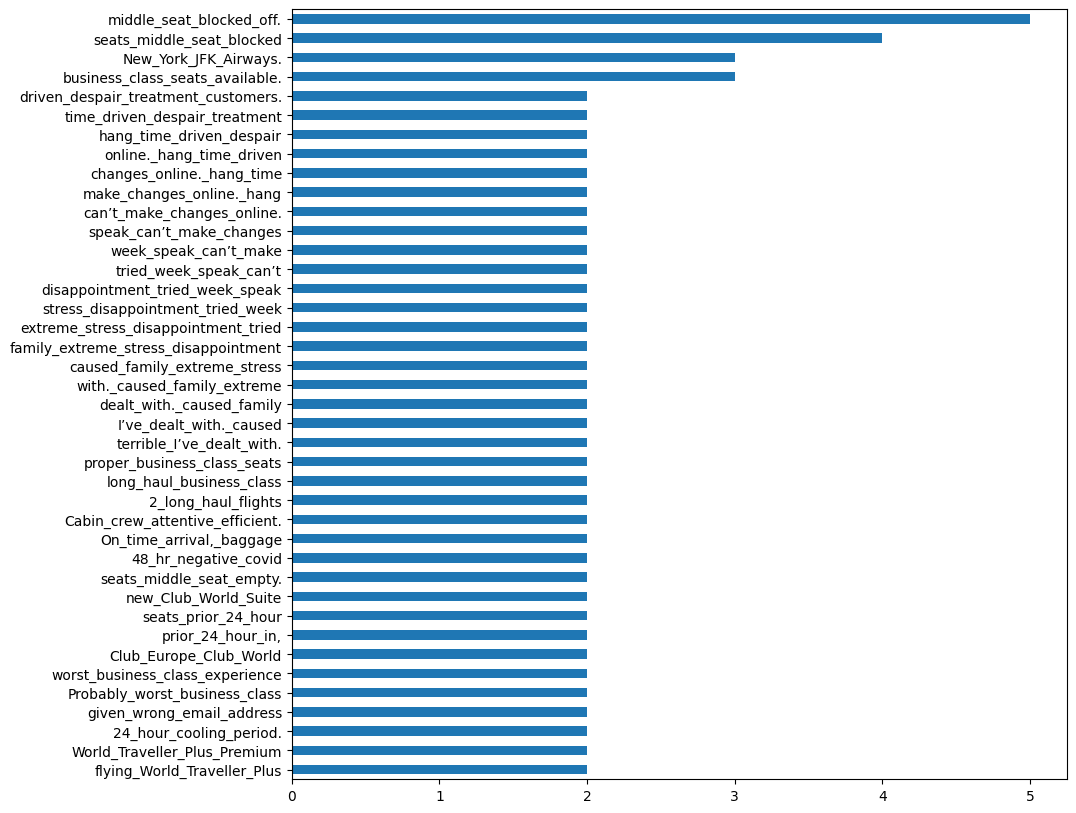

In [28]:
#Most common words

import nltk.collocations as collocations
from nltk import FreqDist, bigrams

def get_freq_dist(new_words,number_of_ngrams ):
    from nltk import ngrams
    
    ## Generate bigrams
    ngrams = ngrams(new_words, number_of_ngrams)

    ## Creating FreqDist
    ngram_fd = FreqDist(ngrams).most_common(40)

    ## Sort values by highest frequency
    ngram_sorted = {k:v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Join bigram tokens with '_' + maintain sorting
    ngram_joined = {'_'.join(k):v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Convert to Pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax = ngram_freqdist.plot(kind="barh")
    
    return ax


get_freq_dist(new_words,4)